# Predict output based on input numbers (y = 2x)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2026-01-30 10:57:21.207818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769770641.507119      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769770641.596682      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769770642.344866      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769770642.344907      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769770642.344912      55 computation_placer.cc:177] computation placer alr

In [2]:
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)

Explanation:

	•	x = input
	•	y = expected output
	•	Relationship: y = 2x


# Step 3: Build Neural Network Model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-30 10:57:40.852410: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',metrics=['accuracy']
)

In [5]:
history = model.fit(x, y, epochs=200, verbose=0)

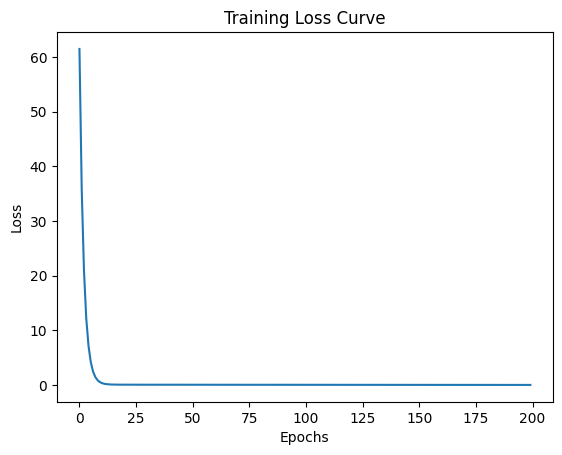

In [6]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

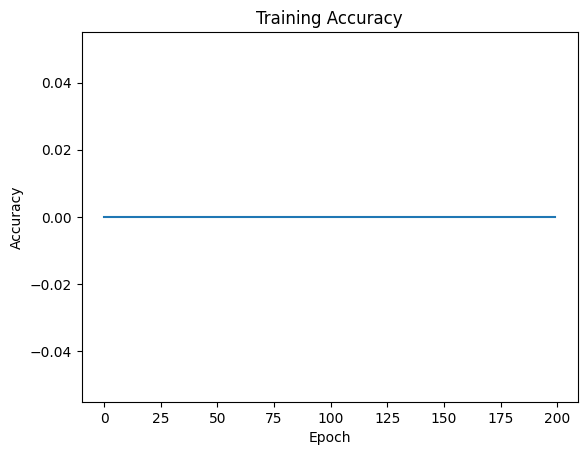

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()


In [8]:
import numpy as np

print(model.predict(np.array([[10]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[19.453213]]


# PyTorch

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [10]:
x = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
y = torch.tensor([[2.0],[4.0],[6.0],[8.0],[10.0]])

In [11]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

Explanation:

	•	backward(): Calculates gradients
	•	step(): Updates weights


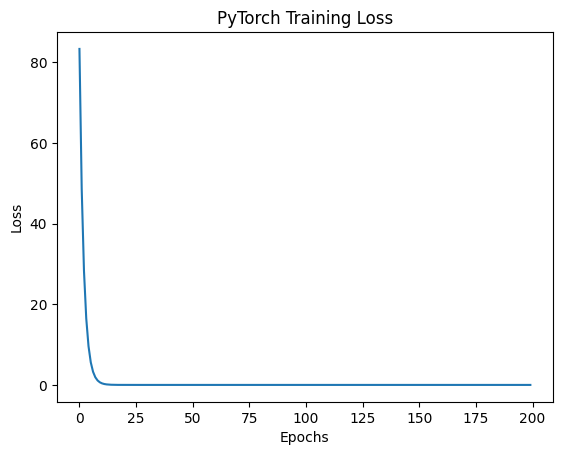

In [14]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("PyTorch Training Loss")
plt.show()

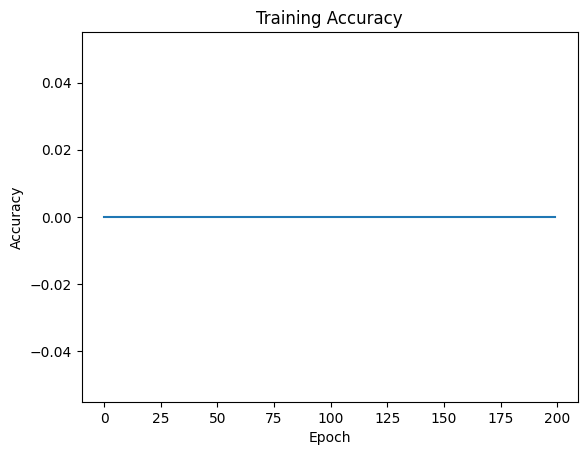

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()


In [16]:
print(model(torch.tensor([[10.0]])))

tensor([[20.0785]], grad_fn=<AddmmBackward0>)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


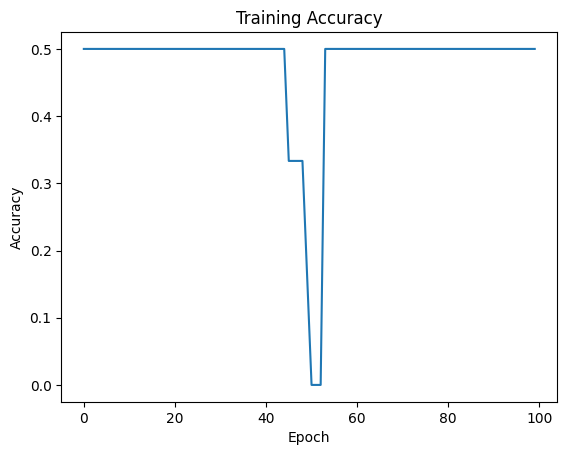

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data (classification)
x = np.array([1,2,3,6,7,8], dtype=float)
y = np.array([0,0,0,1,1,1], dtype=float)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[1])
])

# Compile (IMPORTANT)
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x, y,
    epochs=100,
    verbose=0
)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()